In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load the training data
train = pd.read_csv("/kaggle/input/who-is-the-real-winner/train.csv")

# Load the test data
test = pd.read_csv("/kaggle/input/who-is-the-real-winner/test.csv")

# Handle missing values
train = train.fillna('Unknown')
test = test.fillna('Unknown')

# Combine training and test data to ensure consistent label encoding
combined_data = pd.concat([train, test])

# Convert categorical variables into numerical ones
le = LabelEncoder()
for column in combined_data.columns:
    if combined_data[column].dtype == 'object':
        combined_data[column] = le.fit_transform(combined_data[column])

# Separate combined data back into training and test data
train = combined_data[:len(train)]
test = combined_data[len(train):]

# Separate features and target variable for training data
X_train = train.drop(columns=['Education'])
y_train = train['Education']

# Choose a machine learning model
model = RandomForestClassifier(n_estimators=20)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_encoded = model.predict(test.drop(columns=['Education']))

# Map encoded education values back to their original labels
test_predictions = le.inverse_transform(test_predictions_encoded)

# Store the output in a CSV file
test_output = pd.DataFrame({'ID': test['ID'], 'Education': test_predictions})
test_output.to_csv('Submissions.csv', index=False)


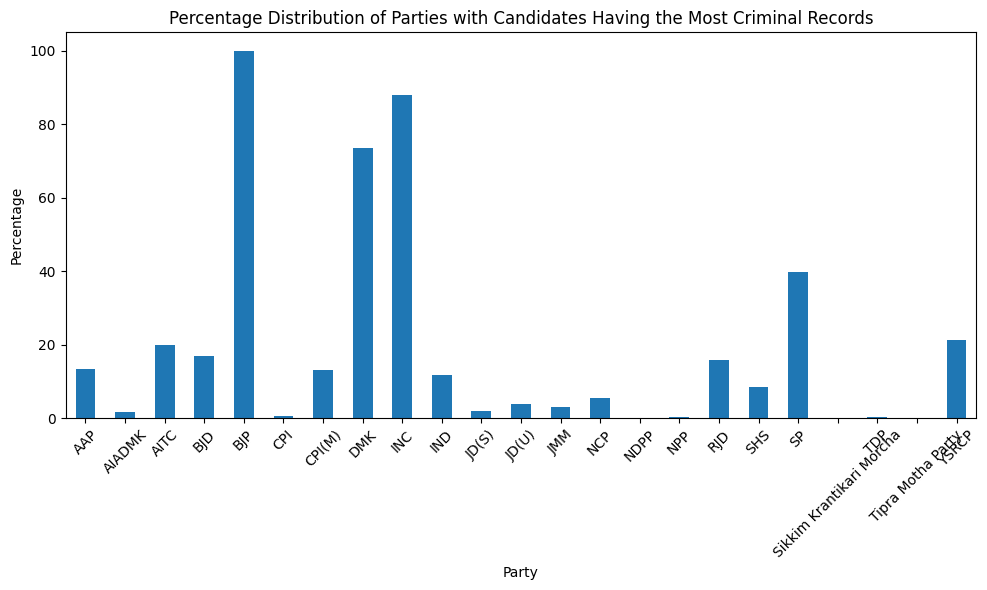

<Figure size 640x480 with 0 Axes>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data
train = pd.read_csv("/kaggle/input/who-is-the-real-winner/train.csv")

# Group data by political party and sum up the total number of criminal cases for each party
party_criminal_cases = train.groupby('Party')['Criminal Case'].sum()

# Find the party with the maximum number of criminal cases
party_most_criminal_records = party_criminal_cases.idxmax()
most_criminal_records = party_criminal_cases.max()

# Calculate percentage distribution of parties with candidates having the most criminal records
percentage_distribution = (party_criminal_cases / most_criminal_records) * 100

# Plot the percentage distribution
plt.figure(figsize=(10, 6))
percentage_distribution.plot(kind='bar')
plt.title('Percentage Distribution of Parties with Candidates Having the Most Criminal Records')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Save the plot as JPG file
plt.savefig('criminal_records_distribution.jpg')